we will study fractals and symmetry as a way of learning the basics of Tensorﬂow

NumpyvsTensorflowvsPyTorch
The foundation of Tensorﬂow (TF) is based on n-dimensional arrays in a similar manner to Numpy.
These arrays are actually called Tensors, but for now we will refer to them as just arrays.
NumPy (one of the pioneer libraries to bring efficient numerical computation to Python) 
and TensorFlow (a more recently rolled-out library focused more on deep learning algorithms).
While Pytorch is same as Tensorflow but it is dynamic,good for research or home appllication,Facebook AI invention whether
Tensorflow is static,good for industry production,Google brain invention.

 a structure with self-similarity at all scales is called a fractal.
 All fractals can be generated using an Iterated Function System (IFS). An IFS consists of a function f which is executed in a feedback loop, also known to computer students as a recursive function. That means, the output of the function is given as input when the function calls itself.

 A 2D Gabor filter is a Gaussian kernel function modulated by a sinusoidal plane wave. Below 1st COMPLEX comprised with 2nd REAL & 3rd IMAGINARY parts.
 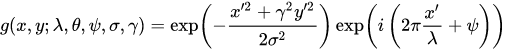

 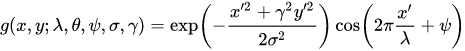
 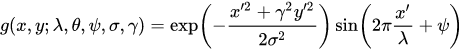
 image.png
 image.png
 

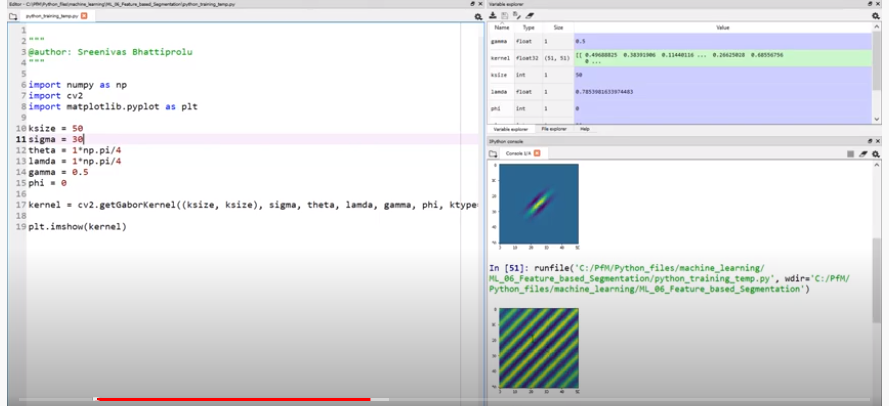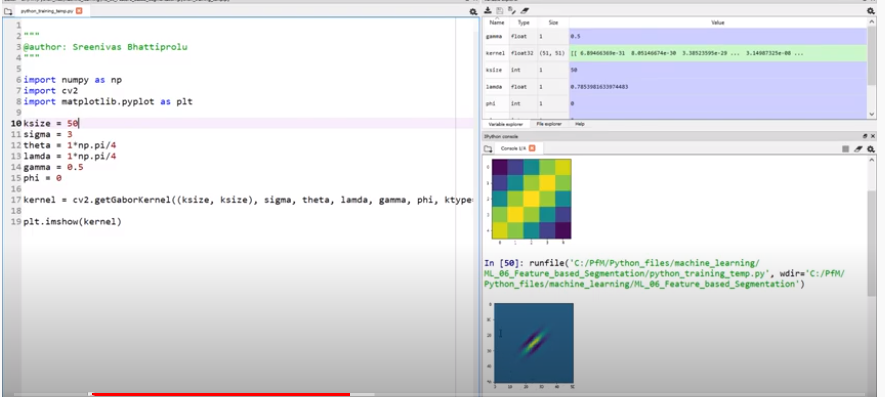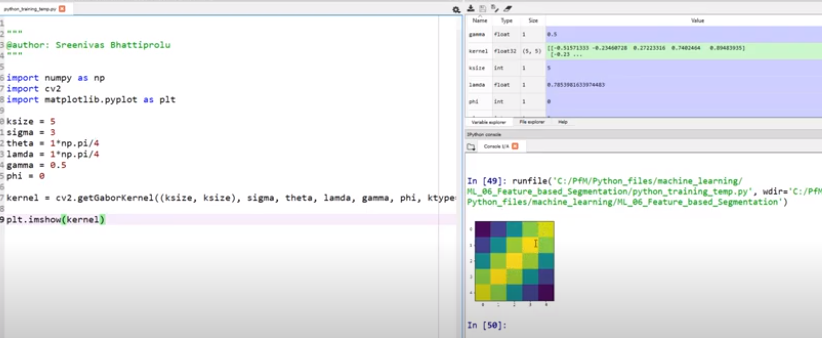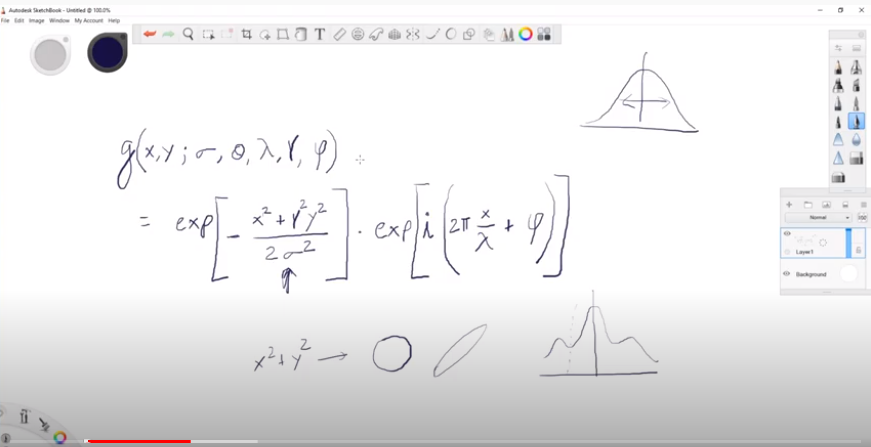

 the Mandelbrot set is a set of points in the complex plane. The complex plane is a two-dimensional space with the a vertical imaginary axis, and a horizontal real axis. A point in the plane can be described using a complex number c ∈ C written on the form c = a + bi where a,b ∈ R and i = √−1.

  A point c ∈C belong to the Mandelbrot set iﬀ lim n→∞||zn+1 = z2 n + c||9∞ where z0 = 0 Here we have an IFS with the recursive formula zn+1 = zn + c and an initial value of z0 = 0. In each loop, you square the previous number and seed the result with the value of c. The vertical brackets denotes the Euclidean norm, which is a measurement of how far away a point in the plane is from origo, ||z|| = √a2 + b2. A point c belongs to the Mandelbrot set if it remains bounded when we run the formula in a feedback loop. 

   If the point still remains within a radius of 2 from origo you consider the point to belong to the set. Why 2? Well, it is possible to show, and this an important result, that if ||zn||≥ 2, zn will eventually escape towards inﬁnity [7]. This is called the bailout radius. 

   While the Mandelbrot set is created using diﬀerent values on c and an initial value of z0 = 0, a Julia set is created using a ﬁxed c as seed and diﬀerent values on z. The complex number c can be chosen freely [1]. If the point c chosen does not belong to the Mandelbrot set, the resulting fractal will be a Cantor dust fractal. To determine whether a point z belongs to the Julia set with seed c, iterate the formula zn+1 = zn + c in the same manner as with the Mandelbrot set.
   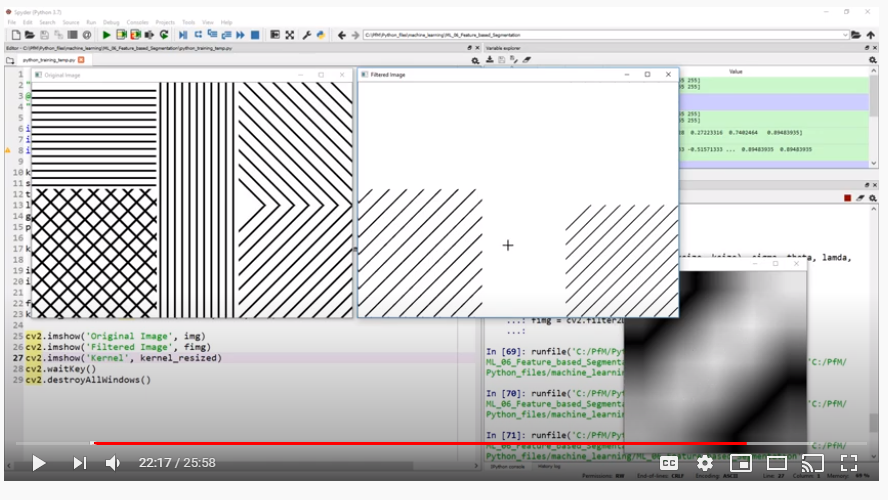


In [ ]:
#PART1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generating the grid
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

In [ ]:
xs = tf.constant(X.astype(np.float32))
ys = tf.constant(Y.astype(np.float32))
theta = np.pi/4
# Transforming the axis using the rotation component of Gaussian envelope
x1 = xs * np.cos(theta) + ys * np.sin(theta)
y1 = -xs * np.sin(theta) + ys * np.cos(theta)

In [ ]:
# Computing Gaussian
zs = tf.exp(-(x1**2+y1**2)/2.0)

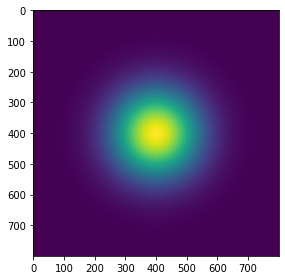

In [ ]:
# Plotting the Gaussian
plt.imshow(zs.numpy())
plt.tight_layout()
plt.show()

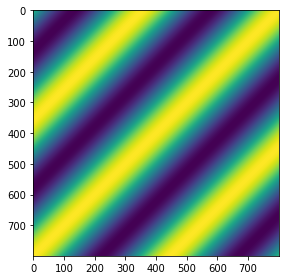

In [ ]:
# Computing the Cosine Function
ss = tf.cos(2*x1)*tf.exp(np.pi**2/2)
plt.imshow(ss.numpy())
plt.tight_layout()
plt.show()

In [ ]:
# Computing the Gabor filter function
fs = zs*ss

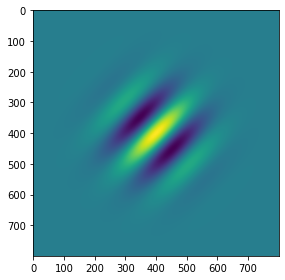

In [ ]:
# Plotting the Gabor Filter
plt.imshow(fs.numpy())
plt.tight_layout()
plt.show()

In [ ]:
#PART2
# Using numpy to create a 2D array of complex numbers on [-2,2] x [-2,2]
Y,X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X + 1j*Y

In [ ]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs,tf.float32))

In [ ]:
# Mandelbrot Set
for i in range(200):
  # Computing the new values of z = z^2 + x
  zs_ = zs*zs + xs
  # Checking for the divergence of the new point generated
  not_diverged = tf.abs(zs_)<2
  # Updating variables to compute
  ns.assign_add(tf.cast(not_diverged,tf.float32))
  zs.assign(zs_)

In [ ]:
def processFractal(a):
  """Display an array of iteration counts as a
      colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

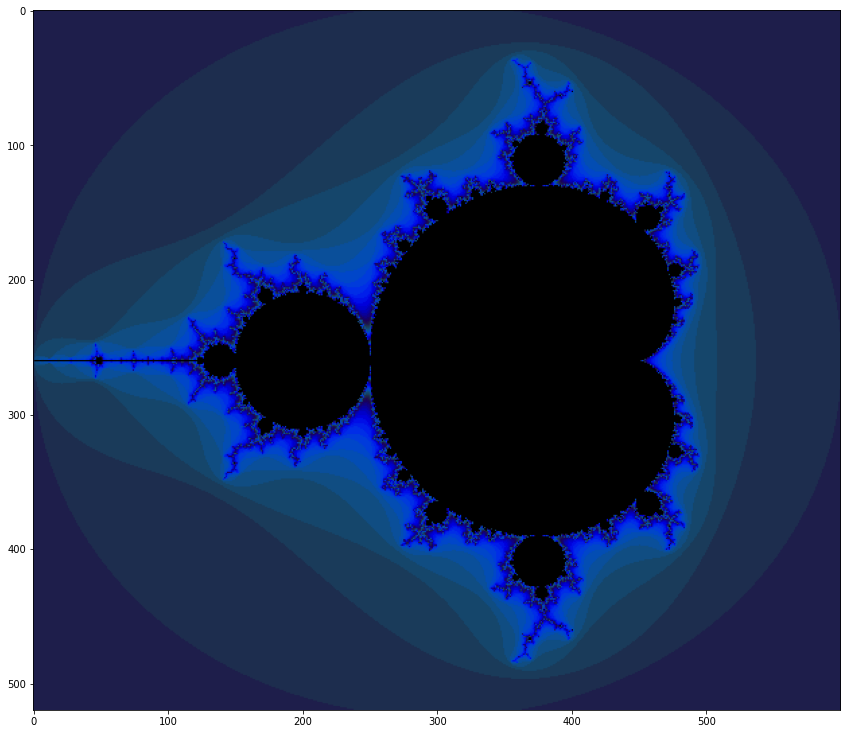

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#High Resolution Computation by decreasing grid spacing

# Using numpy to create a 2D array of complex numbers on [-2,2] x [-2,2]
Y_sp,X_sp = np.mgrid[-1.3:1.3:0.0005, -2:1:0.0005]
Z_sp = X_sp + 1j*Y_sp

In [ ]:
xs_sp = tf.constant(Z_sp.astype(np.complex64))
zs_sp = tf.Variable(xs_sp)
ns_sp = tf.Variable(tf.zeros_like(xs_sp,tf.float32))

In [ ]:
# High Resolution Mandelbrot set
for i in range(200):
  zs_sp_ = zs_sp*zs_sp + xs_sp
  # Checking for the divergence of the new point
  not_diverged_sp = tf.abs(zs_sp_)<2
  # Updating variables to compute
  ns_sp.assign_add(tf.cast(not_diverged_sp,tf.float32))
  zs_sp.assign(zs_sp_)

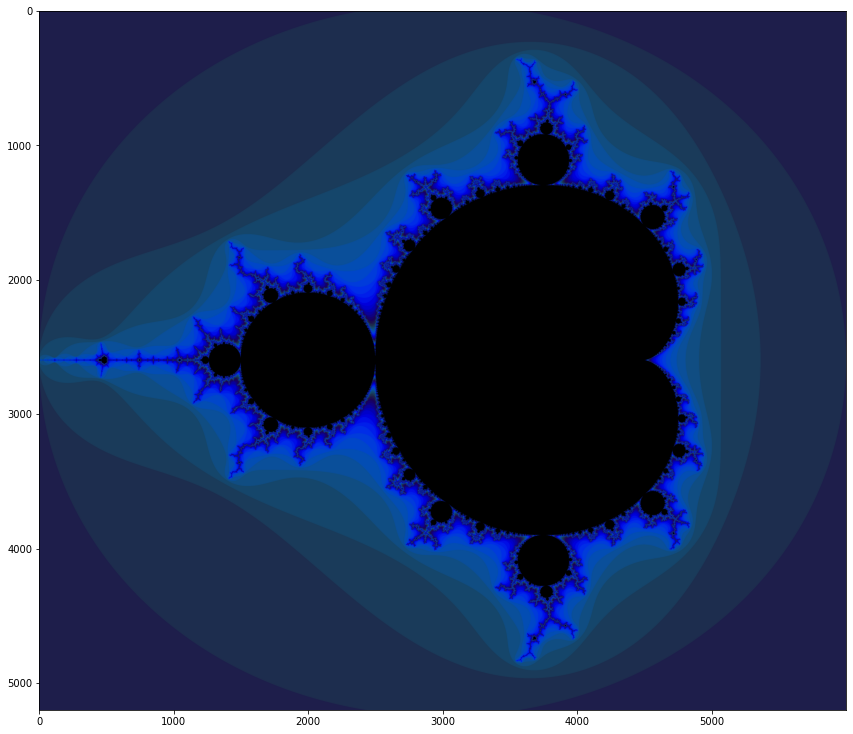

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns_sp.numpy()))
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Zooming into a section of the Mandelbrot

# Generating the grid and the transformed complex grid
Y_ds,X_ds = np.mgrid[0:1:0.0005, -1:1:0.0005]
Z_ds = 0.2*((X_ds-4.2) + 1j*(Y_ds+1.5))

In [ ]:
xs_ds = tf.constant(Z_ds.astype(np.complex64))
zs_ds = tf.Variable(xs_ds)
ns_ds = tf.Variable(tf.zeros_like(xs_ds,tf.float32))

In [ ]:
# Zooming into a section of the mandelbrot
for i in range(200):
  zs_ds_ = zs_ds*zs_ds + xs_ds
  # Checking for the divergence
  not_diverged_ds = tf.abs(zs_ds_)<2
  # Updating variables to compute
  ns_ds.assign_add(tf.cast(not_diverged_ds,tf.float32))
  zs_ds.assign(zs_ds_)

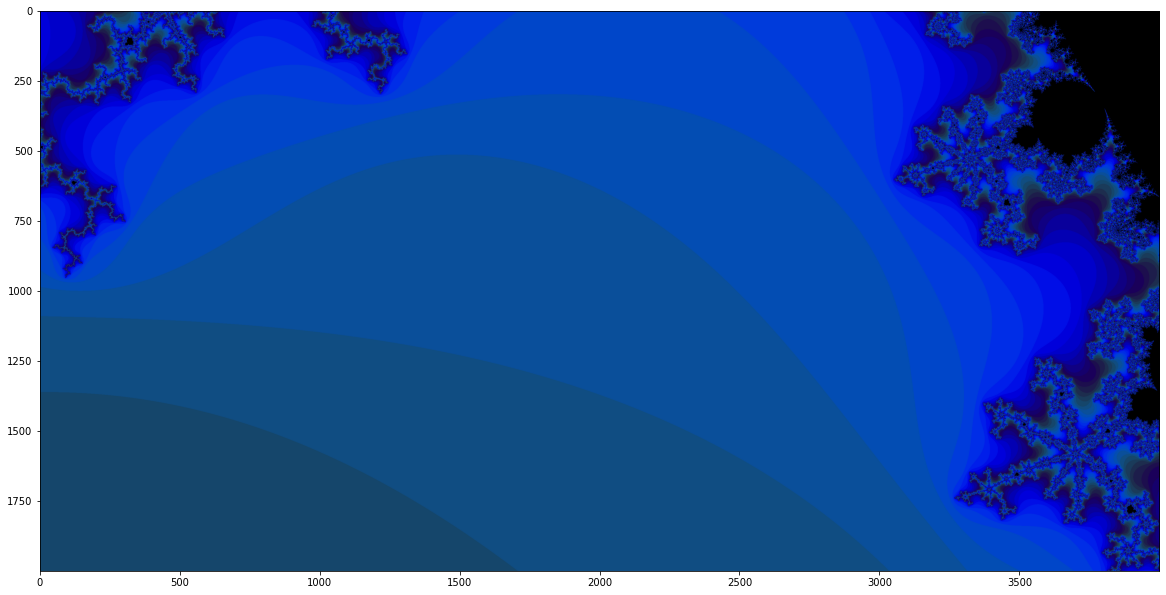

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns_ds.numpy()))
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Generating Julia Set

# Generating the grid for the Julia set and the corresponding complex grid
Y_julia,X_julia = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005]
Z_julia = X_julia + 1j*Y_julia

In [ ]:
xs_julia = tf.Variable(Z_julia.astype(np.complex64))
zs_julia = tf.Variable(xs_julia)
ns_julia = tf.Variable(tf.zeros_like(xs_julia,tf.float32))
c = tf.complex(-0.755262,0.094211)

In [ ]:
# Generating Julia Set
for i in range(200):
  # Computing the new values of z = z^2 + c
  zs_julia_ = zs_julia*zs_julia + c
  # Checking for the divergence
  not_diverged_julia = tf.abs(zs_julia_)<2
  # Updating variables to compute
  ns_julia.assign_add(tf.cast(not_diverged_julia,tf.float32))
  zs_julia.assign(zs_julia_)

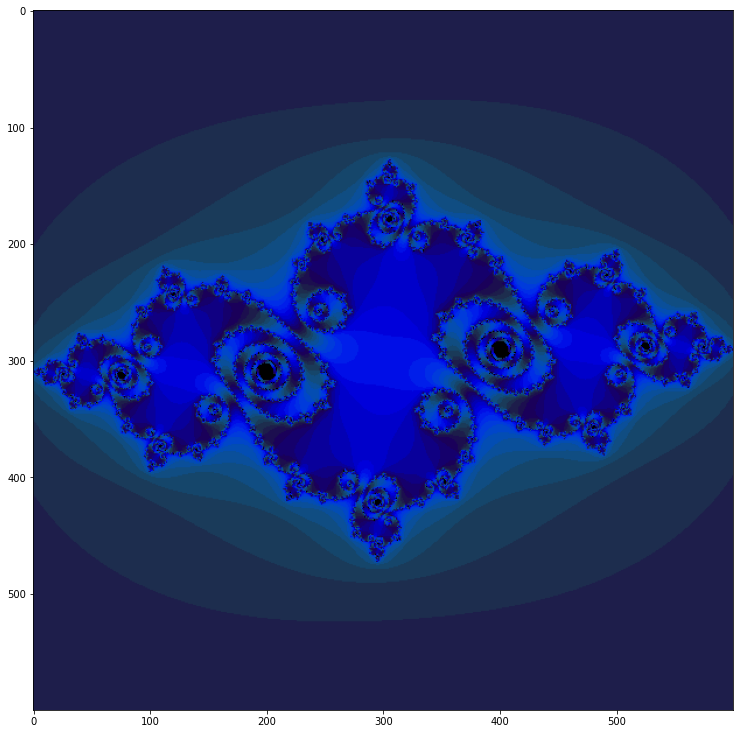

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns_julia.numpy()))
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#PART3

In [ ]:
import tensorflow as tf
a = tf.range(0,1,(1/1))
b = tf.range(0,1,(1/2))
c = tf.range(0,1,(1/3))
d = tf.range(0,1,(1/4))
print('T'*tf.size(a).numpy(),end='\n')
print('T'*tf.size(b).numpy(),' '*tf.size(b).numpy(),' '*tf.size(b).numpy(),'T'*tf.size(b).numpy(),sep='',end='\n')
print('T'*tf.size(c).numpy(),' '*tf.size(c).numpy(),'T'*tf.size(c).numpy(),' '*tf.size(b).numpy(),'T'*tf.size(c).numpy(),sep='',end='\n')

T
TT    TT
TTT   TTT  TTT
